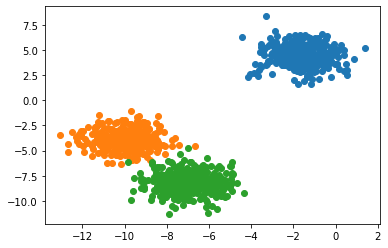

x_train.shape: torch.Size([600, 2]) x_validation.shape: torch.Size([150, 2]) x_test.shape: torch.Size([250, 2])


In [1]:
# MLP by Rozita 9/16/2021

import torch
import torch.nn as nn  #replace all torch.nn as nn
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from numpy import where


#step 1: generate Data 

# 1-1 first approach 
#x=torch.randn(100,3)  #3D
#yt=torch.randn(100,2) #Label, 2D
#print(x.shape)
#x=torch.FloatTensor(x)     #do not forget to convert data from numpyarray to tensor
                            #or use torch.tensor(x).float()
#yt=torch.LongTensor(yt)    #or use torch.tensor(yt).long()


# 1-2 you can generate data in this way, too
#n_features means x,y , our data and Labels
#if you get same data in each iteration use random_state=1
num_features=2
num_classes=3
num_samples=1000

x, yt = make_blobs(n_samples=num_samples, n_features=num_features, centers=num_classes, cluster_std=1.0, random_state=1)

#plotting Data
for class_value in range(num_classes):
    row_idx = where(yt == class_value)
    pyplot.scatter(x[row_idx, 0], x[row_idx, 1])
pyplot.show()


# split samples into three sets: Train, Validation, Test
# Later you can change this part for K-fold cross-validation -------------------------------
x_train= torch.tensor(x[:int(0.6*num_samples),:]).float()
y_train= torch.tensor(yt[:int(0.6*num_samples)]).long()

x_valid=torch.tensor(x[int(0.6*num_samples):int(0.75*num_samples),:]).float()
y_valid=torch.tensor(yt[int(0.6*num_samples):int(0.75*num_samples)]).long()

#x_test=torch.tensor(x[int(0.75*num_samples):num_samples,:]).float()  
#or
x_test = torch.tensor(x[int(0.75*num_samples):, :]).float()
y_test=torch.tensor(yt[int(0.75*num_samples)]).long()


#---------------------------------------------------------------------------------------------

print ('x_train.shape:', x_train.shape, 'x_validation.shape:', x_valid.shape, 'x_test.shape:', x_test.shape)


In [2]:
# step 2) Define Model, Loss, Optimizer ------------------------------------------------------------------------
# 2-1)creat a Model
# 2-1-1) In case of single layer:
#model=torch.nn.Linear(num_features,num_classes)  #input No. is 3 and output No. is 2
# 2-1-2) In case of multi-layer:

num_hidden1=10;
model = nn.Sequential(
                          nn.Linear(num_features,num_hidden1),
                          nn.ReLU(),                           #see other activation functions in help of pytorch
                          nn.Linear(num_hidden1, num_classes)
                         )

# 2-2) Loss Function
# MSE loss not good idea for classification, use pytorch.org in doc, see torch.nn and in help look for loss
loss = nn.CrossEntropyLoss()  #since cross-entropy has softmax, we did not use softmax in the model definition in step 2-1

# 2-3) optimizer
optimizer=torch.optim.SGD(model.parameters(), lr=0.001) #lr is Learning rate

print('Model:',model,'\n Loss:', loss, '\n optimizer:', optimizer)


Model: Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=3, bias=True)
) 
 Loss: CrossEntropyLoss() 
 optimizer: SGD (
Parameter Group 0
    dampening: 0
    lr: 0.001
    momentum: 0
    nesterov: False
    weight_decay: 0
)


In [10]:
#Train
num_epochs=200
for epoch in range(num_epochs):
    # this is necessary to reset gradients (write model.bias.grad in command window when running breakpoint)
    optimizer.zero_grad()
    yp = model(x_train)
    loss_value=loss(yp,y_train)
    # (yp is 1000*3), torch.max, finds maximum in each sample
    # a includes two values: indices and values
    # use breakpoint and check a=torch.max(yp,1) and a[0]==yt , 0 indicates incorrect and 1 indicates correct
    #  or a=torch.argmax(yp,1)

    num_corrects=torch.sum(torch.max(yp,1)[1]==y_train) #use breakpoint
    acc_train=num_corrects.float()/num_samples.__float__()  #use breakpoint
    # or acc=num_corrects.float()/float(num_samples)

    loss_value.backward()
    optimizer.step()
    #model.weights.grad
    #model.bias.grad

    yp=model(x_valid) # for validation you do not need loss_value.backward
    num_corrects = torch.sum(torch.max(yp, 1)[1] == y_valid)  # use breakpoint
    acc_valid = num_corrects.float() / num_samples.__float__()  # use breakpoint

    print('epoch:', epoch, 'loss_value:', loss_value.item(),'Train accuracy:', acc_train.item(),'Validation accuracy:', acc_valid.item())

# This part is out of train loop and it is for Test data
 # for test you do not need loss_value.backward
yp=model(x_test)
num_corrects = torch.sum(torch.max(yp, 1)[1] == y_test)  # use breakpoint
acc_test= num_corrects.float() / float(num_samples)  # use breakpoint
print('\n Test accuracy:', acc_test.item())


epoch: 0 loss_value: 0.23506437242031097 Train accuracy: 0.5950000286102295 Validation accuracy: 0.14900000393390656
epoch: 1 loss_value: 0.23470042645931244 Train accuracy: 0.5950000286102295 Validation accuracy: 0.14900000393390656
epoch: 2 loss_value: 0.23433749377727509 Train accuracy: 0.5950000286102295 Validation accuracy: 0.14900000393390656
epoch: 3 loss_value: 0.23397588729858398 Train accuracy: 0.5950000286102295 Validation accuracy: 0.14900000393390656
epoch: 4 loss_value: 0.2336151897907257 Train accuracy: 0.5950000286102295 Validation accuracy: 0.14900000393390656
epoch: 5 loss_value: 0.2332555651664734 Train accuracy: 0.5950000286102295 Validation accuracy: 0.14900000393390656
epoch: 6 loss_value: 0.23289726674556732 Train accuracy: 0.5950000286102295 Validation accuracy: 0.14900000393390656
epoch: 7 loss_value: 0.23253999650478363 Train accuracy: 0.5950000286102295 Validation accuracy: 0.14900000393390656
epoch: 8 loss_value: 0.23218384385108948 Train accuracy: 0.5950000

epoch: 77 loss_value: 0.20997777581214905 Train accuracy: 0.5950000286102295 Validation accuracy: 0.14900000393390656
epoch: 78 loss_value: 0.209687277674675 Train accuracy: 0.5950000286102295 Validation accuracy: 0.14900000393390656
epoch: 79 loss_value: 0.20939753949642181 Train accuracy: 0.5950000286102295 Validation accuracy: 0.14900000393390656
epoch: 80 loss_value: 0.20910856127738953 Train accuracy: 0.5950000286102295 Validation accuracy: 0.14900000393390656
epoch: 81 loss_value: 0.20882059633731842 Train accuracy: 0.5950000286102295 Validation accuracy: 0.14900000393390656
epoch: 82 loss_value: 0.20853322744369507 Train accuracy: 0.5950000286102295 Validation accuracy: 0.14900000393390656
epoch: 83 loss_value: 0.20824666321277618 Train accuracy: 0.5950000286102295 Validation accuracy: 0.14900000393390656
epoch: 84 loss_value: 0.2079610526561737 Train accuracy: 0.5950000286102295 Validation accuracy: 0.14900000393390656
epoch: 85 loss_value: 0.20767594873905182 Train accuracy: 0

epoch: 160 loss_value: 0.18834228813648224 Train accuracy: 0.597000002861023 Validation accuracy: 0.14900000393390656
epoch: 161 loss_value: 0.18810898065567017 Train accuracy: 0.597000002861023 Validation accuracy: 0.14900000393390656
epoch: 162 loss_value: 0.1878764033317566 Train accuracy: 0.597000002861023 Validation accuracy: 0.14900000393390656
epoch: 163 loss_value: 0.18764421343803406 Train accuracy: 0.597000002861023 Validation accuracy: 0.14900000393390656
epoch: 164 loss_value: 0.18741273880004883 Train accuracy: 0.597000002861023 Validation accuracy: 0.14900000393390656
epoch: 165 loss_value: 0.18718194961547852 Train accuracy: 0.597000002861023 Validation accuracy: 0.14900000393390656
epoch: 166 loss_value: 0.18695157766342163 Train accuracy: 0.597000002861023 Validation accuracy: 0.14900000393390656
epoch: 167 loss_value: 0.1867218166589737 Train accuracy: 0.597000002861023 Validation accuracy: 0.14900000393390656
epoch: 168 loss_value: 0.18649274110794067 Train accuracy: